# Центральная предельная теорема своими руками на примере непрерывного распределения Рэлея

#### 1. Импорт:

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import math
%matplotlib inline

##### 2. Генерация выборки из 1000 значений случайной величины распределения Рэлея:

In [7]:
rv_continuous_rayleigh = sts.rayleigh(loc=0, scale=1)
sample = rv_continuous_rayleigh.rvs(1000)

sample[:10]

array([ 1.06160784,  0.74042587,  1.59035112,  2.15673309,  1.0560738 ,
        0.4024145 ,  0.6466353 ,  0.91755157,  1.32246351,  1.73518981])

#### 3. Построение гистограммы выборки и графика теоретической функции плотности распределения случайной величины:

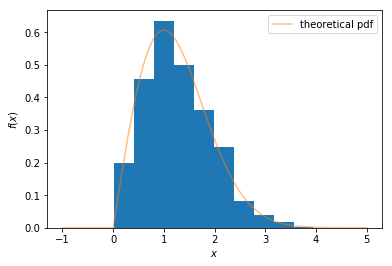

In [11]:
# Гистограмма выборки:
plt.hist(sample, normed=True)

# Теоретическая плотность распределения
x = np.linspace(-1, 5, 1000)
pdf = rv_continuous_rayleigh.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)

plt.legend()
plt.ylabel('$f(x)$')

plt.xlabel('$x$')

#### 4. Оценка распределения выборочного среднего случайной величины при разных объёмах выборок.

Для оценки распределения для каждого значения n - объёма выборки (5, 10, 30, 50) - будет генерироваться 1000 выборок объёма n. Для каждой вычислять выборочное среднее и строить гистограммы распределений выборочных средних для каждого n, а поверх гистограмм строить графики плотности вероятности для нормальных распределений, которые аппроксимирующт выборочные средние при различных n по ЦПТ:

In [33]:
def plot_rv_continuous_rayleigh(size):
    sigma = 1
    
    # Теоретические среднее (мат. ожидание) и дисперсия распределния Рэлея
    th_mean = math.sqrt(math.pi / 2) * sigma
    th_disp = (2 - math.pi / 2)

    # Построение гистограммы по выборке объёма (size)
    sample = list()

    for i in range(0, 1000):
        tmp_sample = rv_continuous_rayleigh.rvs(size)
        cur_mean = sum(tmp_sample) / float(size)
        sample.append(cur_mean)
    
    plt.hist(sample, bins=20, normed=True)

    # Построение графика плотности вероятности нормального распределения (по ЦПТ)
    norm_rv = sts.norm(th_mean, math.sqrt(th_disp / size))
    x = np.linspace(0, 3, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='current norm pdf', alpha=0.5)

    plt.title('n = ' + str(size))
    plt.legend(loc="upper right")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

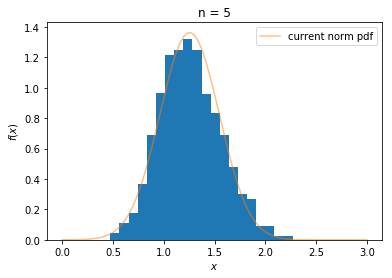

In [27]:
plot_rv_continuous_rayleigh(5)

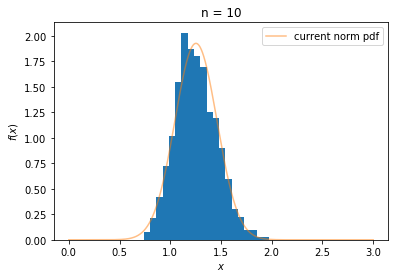

In [28]:
plot_rv_continuous_rayleigh(10)

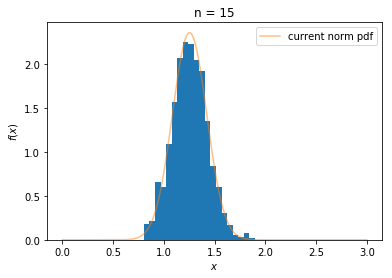

In [29]:
plot_rv_continuous_rayleigh(15)

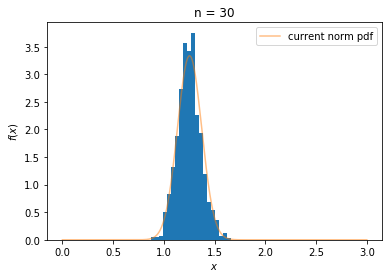

In [30]:
plot_rv_continuous_rayleigh(30)

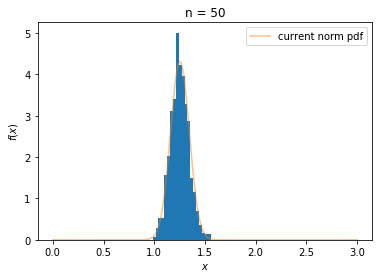

In [31]:
plot_rv_continuous_rayleigh(50)

#### Вывод 
Мы убедились, что точность аппроксимации распределения выборочных средних нормальным с ростом **n** увеличивается, как следствие из Центральной предельной теоремы.